# IPL Data Analysis

IPL is a professional T20 cricket league in India. It was started by BCCI in 2008 played among eight teams representing eight cities of India. It was the first sporting event to be broadcasted live on youtube. This year is 13th season of IPL in UAE.
I got this dataset from Kaggle datasets, it contains five csv files and I'll be performing some of the functions from libraries
like numpy, pandas, seaborn, matplotlib which I've learnt from this course 'Data Analysis with Python: Zero to Pandas' hosted by Jovian.ml

As a first step, let's upload our Jupyter notebook to [Jovian.ml](https://jovian.ml).

In [3]:
project_name = "IPL_data_analysis"

In [2]:
!pip install jovian --upgrade -q

In [1]:
import jovian

In [ ]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


## Data Preparation and Cleaning



In [5]:
#Installing all libraries
!pip install numpy pandas matplotlib seaborn --upgrade --quiet

In [6]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Read Data using pandas

In [8]:
ipl_df = pd.read_csv('matches.csv')

In [9]:
ipl_df.shape

(756, 18)

Information about the dataset used

In [10]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [11]:
#inplace argument is used to make permanent changes in the dataframe
ipl_df.drop(columns=['umpire1','umpire2','umpire3'],inplace=True)

In [12]:
ipl_df.shape

(756, 15)

In [13]:
#checking unique teams palyed so far
ipl_df.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [14]:
# all cities in which matches were played
ipl_df.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [20]:
# Renaming some teams with their new names 
ipl_df.team1.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals'},inplace=True)
ipl_df.team2.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals'},inplace=True)
ipl_df.winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals'},inplace=True)
ipl_df.toss_winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals'},inplace=True)
ipl_df.city.replace({'Bangalore':'Bengaluru'}, inplace=True)

In [21]:
ipl_df.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors'], dtype=object)

In [22]:
ipl_df.team2.unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala'], dtype=object)

In [23]:
ipl_df.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bengaluru', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali'], dtype=object)

In [26]:
#Finding the rows where the city is NaN
ipl_df[ipl_df.city.isna()]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
461,462,IPL-2014,NaN,19-04-2014,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium
462,463,IPL-2014,NaN,19-04-2014,Kolkata Knight Riders,Delhi Capitals,Kolkata Knight Riders,bat,normal,0,Delhi Capitals,0,4,JP Duminy,Dubai International Cricket Stadium
466,467,IPL-2014,NaN,23-04-2014,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium
468,469,IPL-2014,NaN,25-04-2014,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium
469,470,IPL-2014,NaN,25-04-2014,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium
474,475,IPL-2014,NaN,28-04-2014,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium
476,477,IPL-2014,NaN,30-04-2014,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium


In [27]:
#placing city value to Dubai where there is no value
ipl_df.loc[[461,462,466,468,469,474,476],'city'] = 'Dubai'

In [31]:
ipl_df.loc[[461,462,466,468,469,474,476]]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
461,462,IPL-2014,Dubai,19-04-2014,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium
462,463,IPL-2014,Dubai,19-04-2014,Kolkata Knight Riders,Delhi Capitals,Kolkata Knight Riders,bat,normal,0,Delhi Capitals,0,4,JP Duminy,Dubai International Cricket Stadium
466,467,IPL-2014,Dubai,23-04-2014,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium
468,469,IPL-2014,Dubai,25-04-2014,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium
469,470,IPL-2014,Dubai,25-04-2014,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium
474,475,IPL-2014,Dubai,28-04-2014,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium
476,477,IPL-2014,Dubai,30-04-2014,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium


In [34]:
ipl_df.isnull().sum().sum()

8

This gives us that there are still 8 Null values in our dataset.

In [37]:
null_df = ipl_df[ipl_df.isna().any(axis=1)]
null_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
300,301,IPL-2011,Delhi,21-05-2011,Delhi Capitals,Pune Warriors,Delhi Capitals,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla
545,546,IPL-2015,Bengaluru,29-04-2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium
570,571,IPL-2015,Bengaluru,17-05-2015,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium
744,11340,IPL-2019,Bengaluru,30-04-2019,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium


In this result we can see that there are null values in result and player_of_match column and this might be because of 
no match been played that time. So this can be considered

In [39]:
import jovian

In [40]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "swimwithpranjal/ipl-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/swimwithpranjal/ipl-data-analysis


'https://jovian.ml/swimwithpranjal/ipl-data-analysis'

## Exploratory Analysis and Visualization

Let's start with some analysis on our dataset 

In [41]:
# total Number of Matches Played from 2008 - 2019
ipl_df.id.count()

756

In [58]:
# counting no of matches played in each season
no_of_matches_df = ipl_df.groupby('Season')[['id']].count()
no_of_matches_df = no_of_matches_df.sort_values('Season', ascending=False).reset_index()
no_of_matches_df.rename(columns = {'id':'Matches','Season':'Year'},inplace = True)
no_of_matches_df

,Year,Matches
0,IPL-2019,60
1,IPL-2018,60
2,IPL-2017,59
3,IPL-2016,60
4,IPL-2015,59
5,IPL-2014,60
6,IPL-2013,76
7,IPL-2012,74
8,IPL-2011,73
9,IPL-2010,60


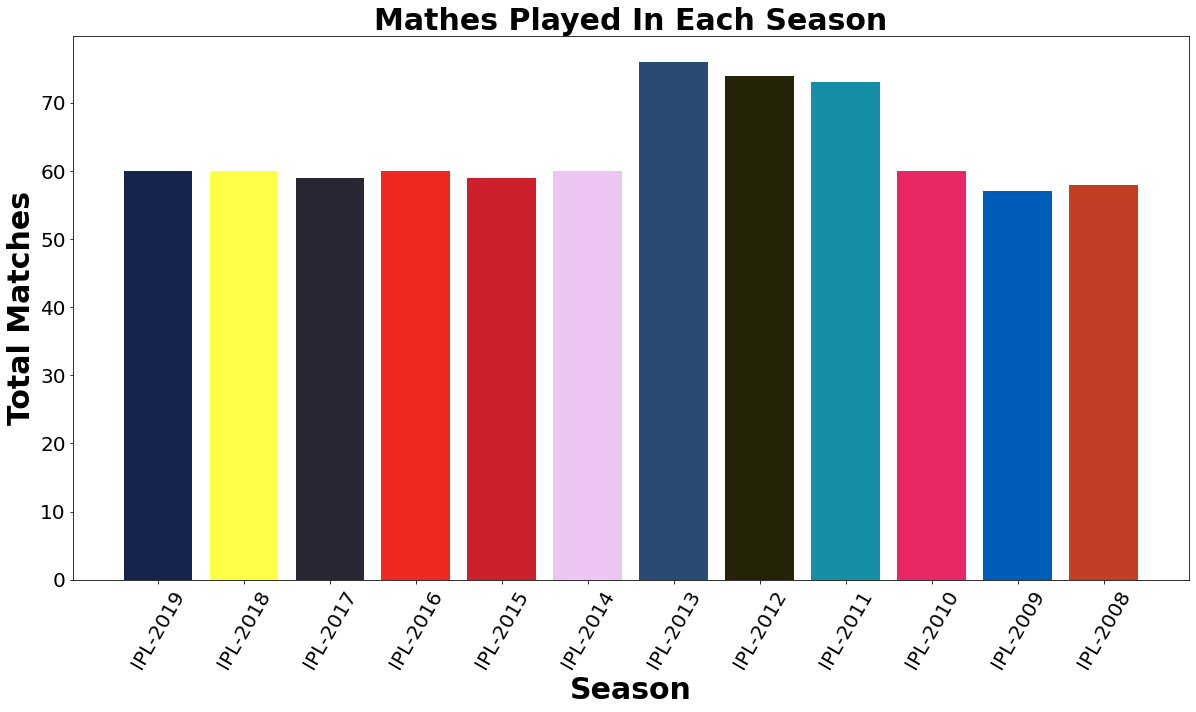

In [57]:
plt.figure(figsize=(20,10))
plt.title("Mathes Played In Each Season",fontweight='bold',fontsize=30)
plt.xlabel('Season',fontweight='bold',fontsize=30)
plt.ylabel('Total Matches',fontweight='bold',fontsize=30)
plt.xticks(rotation='60')
plt.tick_params(labelsize=20)
plt.bar(no_of_matches_df.Year,no_of_matches_df.Matches,color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2',
               '#294A73','#242307','#158EA6','#E82865',
               '#005DB7','#C23E25']);

Total Matches Won By Each Team

In [48]:
winner_df = ipl_df.groupby('winner')[['id']].count()
winner_df = winner_df.sort_values('id', ascending=False).reset_index()

winner_df.rename(columns = {'id':'wins','winner':'Teams'},inplace=True)
winner_df

,Teams,wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Delhi Capitals,77
6,Rajasthan Royals,75
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Rising Pune Supergiant,15


we can see that Mumbai Indians have won maximum times and Kochi tuskers won the least times.

Let's plot these on graph

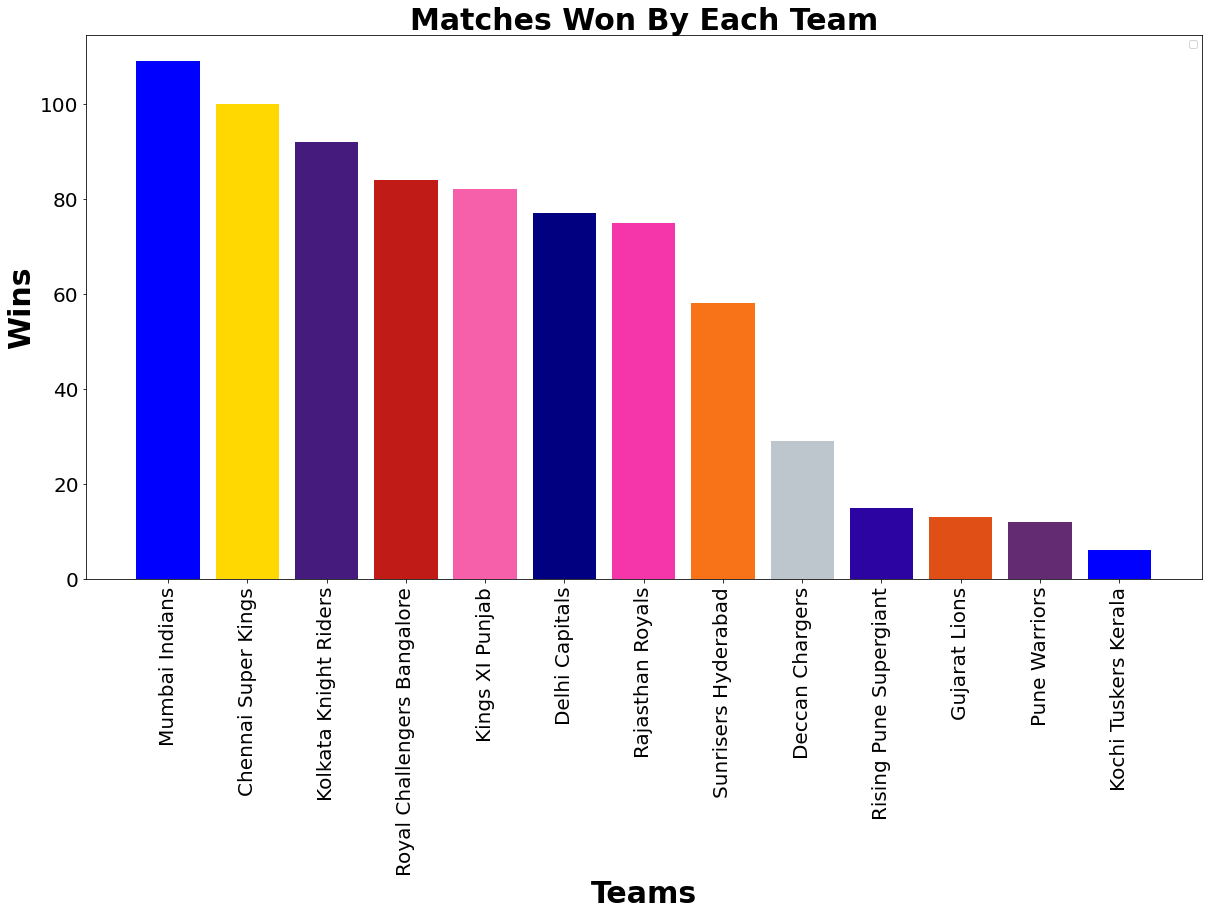

In [51]:
plt.figure(figsize=(20,10))
plt.legend(winner_df.Teams,loc=1)
plt.xlabel('Teams',fontweight='bold',fontsize=30)
plt.ylabel('Wins',fontweight='bold',fontsize=30)
plt.tick_params(labelsize=20)
plt.xticks(rotation=90)
plt.title('Matches Won By Each Team',fontweight='bold',fontsize=30);
plt.bar(winner_df.Teams, winner_df.wins, color = ['blue','#FFD801','#461B7E','#C11B17','#F660AB','#000080','#F535AA','#F87217','#BCC6CC','#2C04A2','#E04F16','#632B72']);

Matches hosted by Cities

In [60]:
city_df = ipl_df.groupby('city')[['id']].count()
city_df=city_df.sort_values('id', ascending=False).reset_index()

city_df.rename(columns = { 'id': 'matches'}, inplace = True)
city_df

,city,matches
0,Mumbai,101
1,Bengaluru,80
2,Kolkata,77
3,Delhi,74
4,Hyderabad,64
5,Chennai,57
6,Jaipur,47
7,Chandigarh,46
8,Pune,38
9,Durban,15


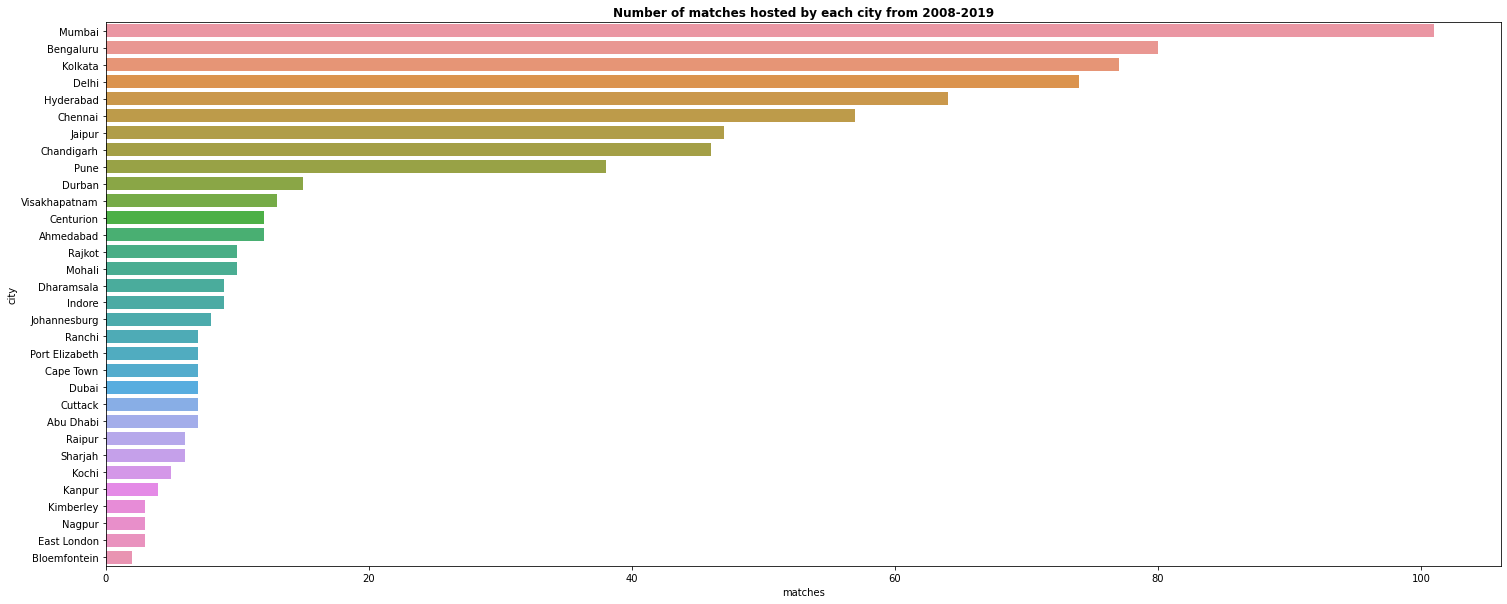

In [64]:
plt.figure(figsize=(25, 10))
plt.title('Number of matches hosted by each city from 2008-2019',fontweight=800)
sns.barplot(y='city', x='matches', data=city_df);

These are some of the plots related to ipl_df dataframe

In [65]:
import jovian

In [66]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "swimwithpranjal/ipl-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/swimwithpranjal/ipl-data-analysis


'https://jovian.ml/swimwithpranjal/ipl-data-analysis'

# Interesting Questions related to IPL

Questions regarding IPL 

1. Total matches played between MI and CSK and which team won most matches?
2. Which player has been awarded with Player Of the Match maximum number Of times?
3. which team won most seasons? Also find the team which played most finals in IPL?
4. Which Season had Most Number of Matches Played?
5. Which city has hosted the maximum number Of IPL Matches?
6. Find the number of matches where toss winner is the match winner?


## Q1. Total matches played between MI and CSK and which team won most matches?

In [69]:
micsk=ipl_df[((ipl_df.team1 =="Mumbai Indians") & 
                   (ipl_df.team2 =="Chennai Super Kings")) | 
                  
                  ((ipl_df.team2 =="Mumbai Indians") & 
                   (ipl_df.team1 =="Chennai Super Kings"))]
micsk

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
66,67,IPL-2008,Chennai,23-04-2008,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk"
95,96,IPL-2008,Mumbai,14-05-2008,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,ST Jayasuriya,Wankhede Stadium
117,118,IPL-2009,Cape Town,18-04-2009,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,19,0,SR Tendulkar,Newlands
161,162,IPL-2009,Port Elizabeth,16-05-2009,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,ML Hayden,St George's Park
193,194,IPL-2010,Mumbai,25-03-2010,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,5,SR Tendulkar,Brabourne Stadium
210,211,IPL-2010,Chennai,06-04-2010,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,24,0,SK Raina,"MA Chidambaram Stadium, Chepauk"
233,234,IPL-2010,Mumbai,25-04-2010,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy
256,257,IPL-2011,Mumbai,22-04-2011,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,8,0,Harbhajan Singh,Wankhede Stadium
307,308,IPL-2012,Chennai,04-04-2012,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,RE Levi,"MA Chidambaram Stadium, Chepauk"
354,355,IPL-2012,Mumbai,06-05-2012,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,2,DR Smith,Wankhede Stadium


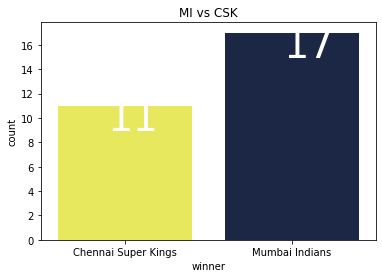

In [70]:
plt.title('MI vs CSK')
sns.countplot(x=micsk['winner'],palette=['#FFFF48','#15244C'])
plt.text(-0.1,9,s=micsk['winner'].value_counts()['Chennai Super Kings'], color='white', size=40)
plt.text(0.95,15,s=micsk['winner'].value_counts()['Mumbai Indians'], color='white', size=40);

## Q2. Which player has been awarded with Player Of the Match maximum number Of times?

In [71]:
player_df = ipl_df.groupby('player_of_match')[['id']].count()
player_df = player_df.sort_values('id',ascending=False).reset_index()
players_df = player_df.head(10).copy()
player_df


,player_of_match,id
0,CH Gayle,21
1,AB de Villiers,20
2,MS Dhoni,17
3,DA Warner,17
4,RG Sharma,17
...,...,...
221,KMDN Kulasekara,1
222,KK Cooper,1
223,K Rabada,1
224,K Paul,1


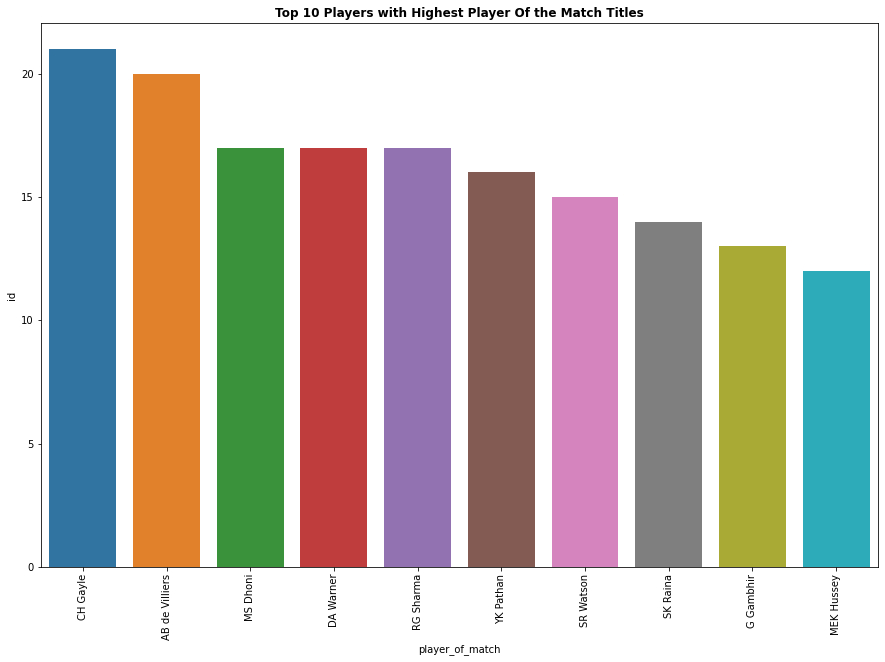

In [75]:
plt.figure(figsize=(15,10))
plt.title("Top 10 Players with Highest Player Of the Match Titles",fontweight='bold' )
plt.xticks(rotation=90)
plt.yticks(ticks=np.arange(0,25,5))
plt.ylabel('No. of Awards')
plt.xlabel('Players')
sns.barplot(x=players_df.player_of_match,y=players_df.id, alpha=1.0);

## Q3. which team won most seasons? Also find the team which played most finals in IPL?

In [78]:
final_df = ipl_df.groupby('Season').tail(1).sort_values('Season').reset_index()
final_df

,index,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,116,117,IPL-2008,Mumbai,01-06-2008,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy
1,173,174,IPL-2009,Johannesburg,24-05-2009,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,6,0,A Kumble,New Wanderers Stadium
2,233,234,IPL-2010,Mumbai,25-04-2010,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy
3,306,307,IPL-2011,Chennai,28-05-2011,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk"
4,380,381,IPL-2012,Chennai,27-05-2012,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,5,MS Bisla,"MA Chidambaram Stadium, Chepauk"
5,456,457,IPL-2013,Kolkata,26-05-2013,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,KA Pollard,Eden Gardens
6,516,517,IPL-2014,Bengaluru,01-06-2014,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,3,MK Pandey,M Chinnaswamy Stadium
7,575,576,IPL-2015,Kolkata,24-05-2015,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,41,0,RG Sharma,Eden Gardens
8,635,636,IPL-2016,Bengaluru,29-05-2016,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium
9,58,59,IPL-2017,Hyderabad,21-05-2017,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal"


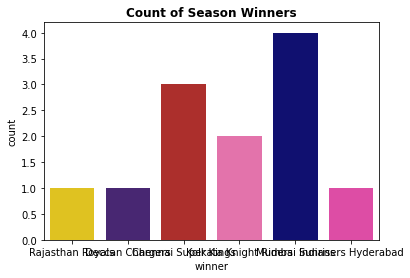

In [81]:
plt.title('Count of Season Winners',fontweight=800)
sns.countplot(x=final_df['winner'],palette=['#FFD801','#461B7E','#C11B17','#F660AB','#000080','#F535AA','#F87217']);

In [83]:
final_match_team = pd.concat([final_df['team1'],final_df['team2']])
final_match_team.value_counts()

Chennai Super Kings            8
Mumbai Indians                 5
Royal Challengers Bangalore    3
Kolkata Knight Riders          2
Sunrisers Hyderabad            2
Rajasthan Royals               1
Rising Pune Supergiant         1
Kings XI Punjab                1
Deccan Chargers                1
dtype: int64

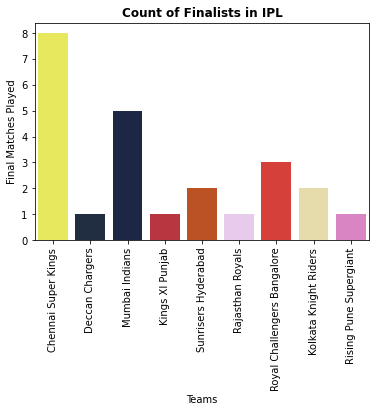

In [84]:
plt.title('Count of Finalists in IPL',fontweight=800)
plt.xlabel('Teams')
sns.countplot(x=final_match_team,palette=['#FFFF48','#1C2C46','#15244C','#CD202D','#D4480B','#ECC5F2','#EF2920','#F0E1A1','#E776CA'])
plt.ylabel('Final Matches Played')
plt.xticks(rotation=90);

## Q4. Which Season had Most Number of Matches Played? 

In [85]:
no_of_matches_df

,Year,Matches
0,IPL-2019,60
1,IPL-2018,60
2,IPL-2017,59
3,IPL-2016,60
4,IPL-2015,59
5,IPL-2014,60
6,IPL-2013,76
7,IPL-2012,74
8,IPL-2011,73
9,IPL-2010,60


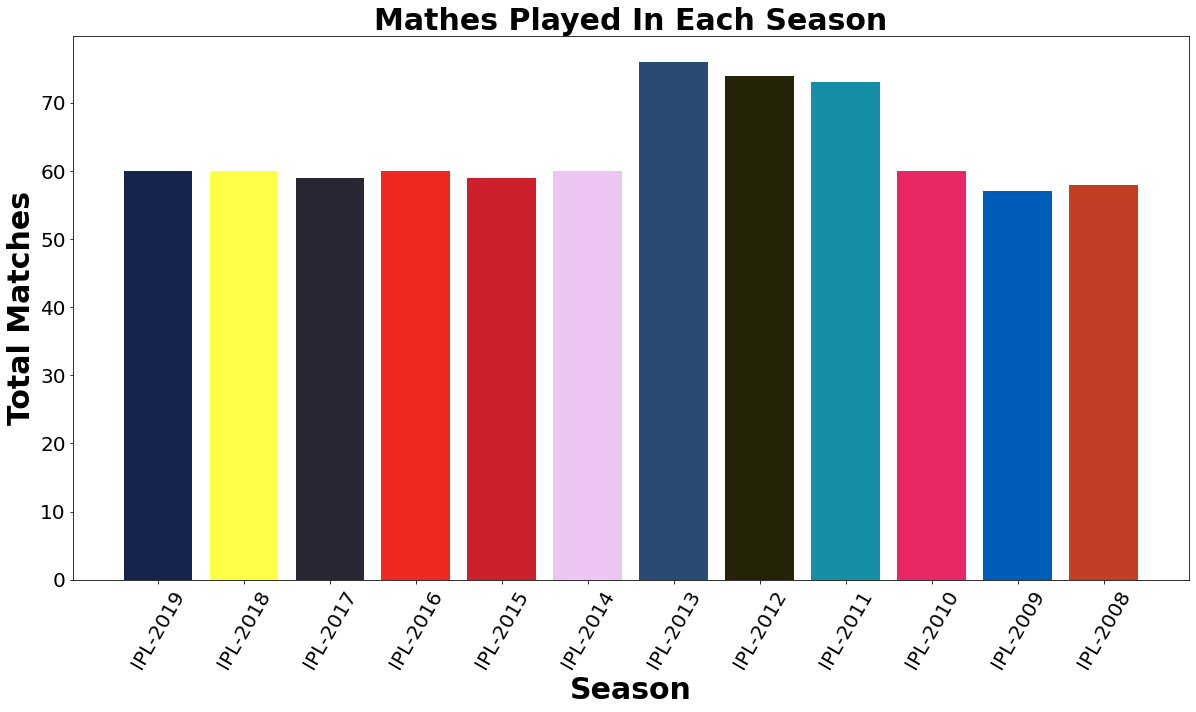

In [86]:
plt.figure(figsize=(20,10))
plt.title("Mathes Played In Each Season",fontweight='bold',fontsize=30)
plt.xlabel('Season',fontweight='bold',fontsize=30)
plt.ylabel('Total Matches',fontweight='bold',fontsize=30)
plt.xticks(rotation='60')
plt.tick_params(labelsize=20)
plt.bar(no_of_matches_df.Year,no_of_matches_df.Matches,color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2',
               '#294A73','#242307','#158EA6','#E82865',
               '#005DB7','#C23E25']);

## Q5. Which city has hosted the maximum number Of IPL Matches?

In [87]:
total_city = list(ipl_df.city.unique())
len(total_city)

32

In [88]:
city_df = ipl_df.groupby('city')[['id']].count()
city_df = city_df.sort_values('id',ascending=False).reset_index()
city = list(city_df.city)
city_df

,city,id
0,Mumbai,101
1,Bengaluru,80
2,Kolkata,77
3,Delhi,74
4,Hyderabad,64
5,Chennai,57
6,Jaipur,47
7,Chandigarh,46
8,Pune,38
9,Durban,15


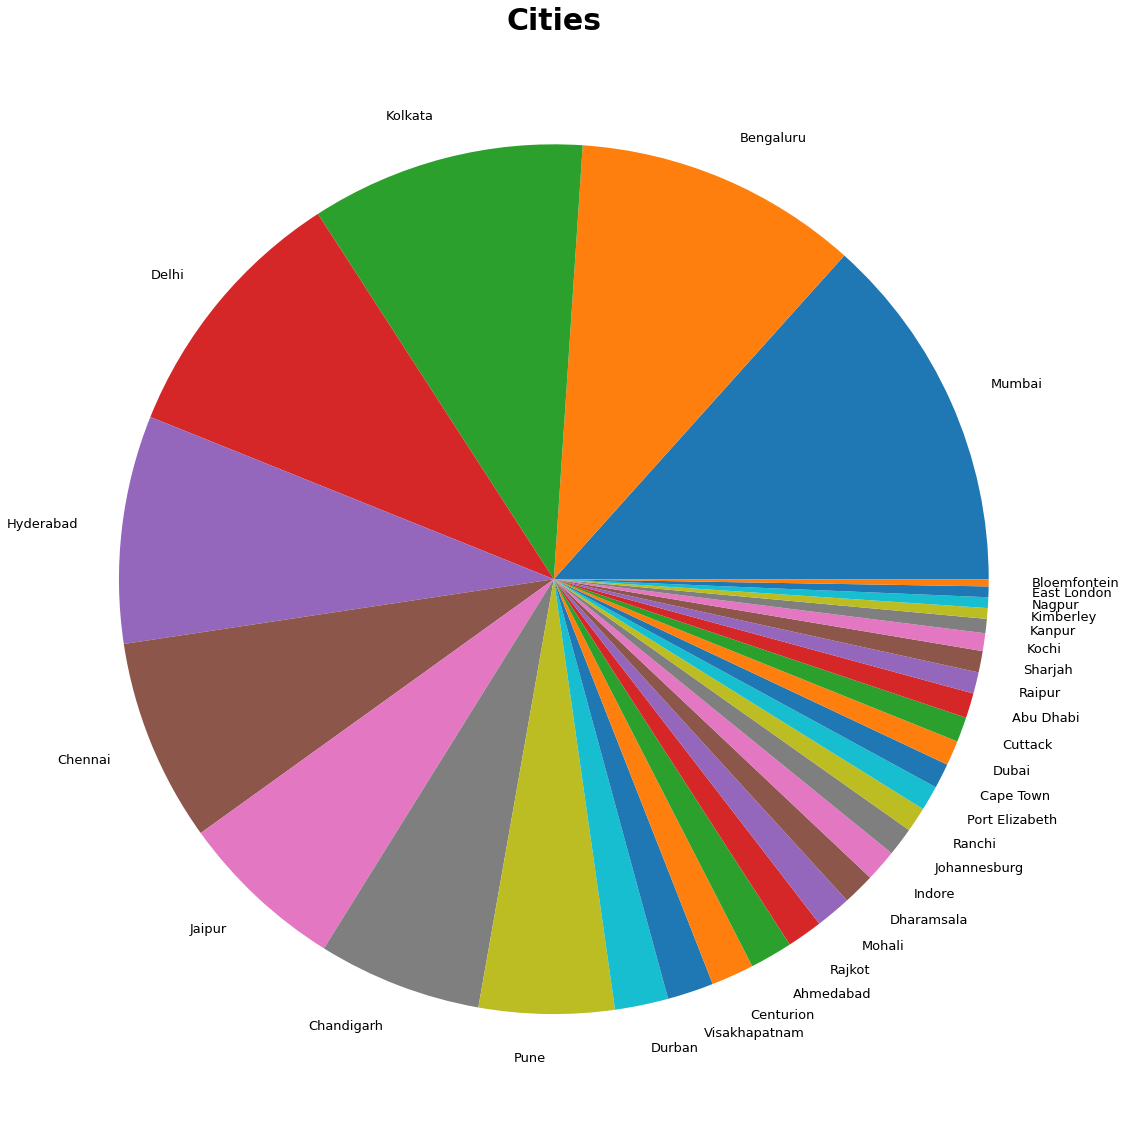

In [91]:
plt.figure(figsize=(20,20))
plt.title("Cities",fontweight='bold',fontsize=30)
plt.tick_params(labelsize=40)
plt.pie(city_df.id,labels=city,textprops={'fontsize': 13});

## Q6. Find the number of matches where toss winner is the match winner? 

In [92]:
toss_n_match_winner_df = ipl_df[ipl_df['toss_winner']==ipl_df['winner']]

toss_n_match_winner_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,IPL-2017,Bengaluru,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium
5,6,IPL-2017,Hyderabad,09-04-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,11346,IPL-2019,Mohali,05-05-2019,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,IS Bindra Stadium
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium


In [95]:
toss_n_match_winner_df = toss_n_match_winner_df[toss_n_match_winner_df.result != 'tie']
print('There are {} matches in IPL played so far where toss winner is also the match winner.'.format(toss_n_match_winner_df.id.count()))

There are 388 matches in IPL played so far where toss winner is also the match winner.


In [96]:
import jovian

In [97]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "swimwithpranjal/ipl-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/swimwithpranjal/ipl-data-analysis


'https://jovian.ml/swimwithpranjal/ipl-data-analysis'

# Inferences and Conclusion


After performing some analysis on this csv file, I would conclude it as-
1. 756 matches are played in IPL since 2008
2. Out of these 756 matches 101 matches are played in Mumbai.
3. Mumbai Indians have won most number of matches i.e. 109 followed by CSK with 100 matches.
4. IPL-2013 hosted highest number of matches i.e. 76
5. CH Gayle has recieved the title of Player of the Match maximum time.
6. Chennai Super Kings played the most final matches(8).


In [1]:
import jovian

In [2]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "swimwithpranjal/ipl-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/swimwithpranjal/ipl-data-analysis


'https://jovian.ml/swimwithpranjal/ipl-data-analysis'

## References and Future Work

The Starter Notebook: https://jovian.ml/aakashns/zerotopandas-course-project-starter

Numpy Documentation: https://numpy.org/devdocs/user/quickstart.html

User guide for Pandas: https://pandas.pydata.org/docs/user_guide/index.html

Seaborn gallery: https://seaborn.pydata.org/examples/index.html

Matplotlib gallery: https://matplotlib.org/3.1.1/gallery/index.html

Data Visualization Cheat Sheet: https://jovian.ml/aakashns/dataviz-cheatsheet

Indian Premier League dataset: https://www.kaggle.com/nowke9/ipldata

In future I would work on other files of this dataset.

In [3]:
import jovian

In [4]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "swimwithpranjal/ipl-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/swimwithpranjal/ipl-data-analysis


'https://jovian.ml/swimwithpranjal/ipl-data-analysis'

In [5]:
import jovian

In [ ]:
jovian